In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import geopandas as gpd
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reads csv files in the folder My Drive/DA Bootcamp/_DA-project_/datasets/
raw_population = pd.read_csv('../datasets/population2024.csv') #https://opendata-ajuntament.barcelona.cat/data/en/dataset/pad_mdbas
raw_transports = pd.read_csv('../datasets/transports.csv') 
raw_bus = pd.read_csv('../datasets/bus_stops.csv')
raw_areas = pd.read_csv('../datasets/district_area.csv')

In [3]:
areas = raw_areas.copy()
areas

,District,District.Area
0,Ciutat Vella,4.11
1,Eixample,7.46
2,Gràcia,4.19
3,Horta-Guinardó,11.96
4,Les Corts,6.02
5,Nou Barris,8.05
6,Sant Andreu,6.59
7,Sant Martí,10.39
8,Sants-Montjuïc,22.68
9,Sarrià-Sant Gervasi,19.91


In [4]:
areas.rename(columns={'District':'District name', 'District.Area':'District area'}, inplace=True)

In [5]:
raw_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_Referencia  1068 non-null   object
 1   Codi_Districte   1068 non-null   int64 
 2   Nom_Districte    1068 non-null   object
 3   Codi_Barri       1068 non-null   int64 
 4   Nom_Barri        1068 non-null   object
 5   AEB              1068 non-null   int64 
 6   Seccio_Censal    1068 non-null   int64 
 7   Valor            1068 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 66.9+ KB


In [6]:
raw_population.duplicated().sum()

np.int64(0)

In [7]:
#cleaning the datasets
population=raw_population.copy()
population

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor
0,2024-01-01,1,Ciutat Vella,1,el Raval,1,1001,1309
1,2024-01-01,1,Ciutat Vella,1,el Raval,1,1002,1282
2,2024-01-01,1,Ciutat Vella,1,el Raval,2,1003,3500
3,2024-01-01,1,Ciutat Vella,1,el Raval,2,1004,2999
4,2024-01-01,1,Ciutat Vella,1,el Raval,3,1005,2326
...,...,...,...,...,...,...,...,...
1063,2024-01-01,10,Sant Martí,73,la Verneda i la Pau,232,10139,1716
1064,2024-01-01,10,Sant Martí,73,la Verneda i la Pau,233,10140,1676
1065,2024-01-01,10,Sant Martí,73,la Verneda i la Pau,233,10141,1175
1066,2024-01-01,10,Sant Martí,73,la Verneda i la Pau,233,10142,1676


In [8]:
population.columns

Index(['Data_Referencia', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'AEB', 'Seccio_Censal', 'Valor'],
      dtype='object')

In [9]:
raw_transports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               651 non-null    object 
 1   Transport          651 non-null    object 
 2   Longitude          651 non-null    float64
 3   Latitude           651 non-null    float64
 4   Station            651 non-null    object 
 5   District.Name      487 non-null    object 
 6   Neighborhood.Name  487 non-null    object 
dtypes: float64(2), object(5)
memory usage: 35.7+ KB


In [10]:
transports = raw_transports.dropna(inplace=False)
transports.isnull().sum()

Code                 0
Transport            0
Longitude            0
Latitude             0
Station              0
District.Name        0
Neighborhood.Name    0
dtype: int64

In [11]:
raw_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               3162 non-null   object 
 1   Transport          3162 non-null   object 
 2   Longitude          3162 non-null   float64
 3   Latitude           3162 non-null   float64
 4   Bus.Stop           3162 non-null   object 
 5   District.Name      3146 non-null   object 
 6   Neighborhood.Name  3146 non-null   object 
dtypes: float64(2), object(5)
memory usage: 173.1+ KB


In [12]:
bus = raw_bus.dropna(inplace=False)
bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3146 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               3146 non-null   object 
 1   Transport          3146 non-null   object 
 2   Longitude          3146 non-null   float64
 3   Latitude           3146 non-null   float64
 4   Bus.Stop           3146 non-null   object 
 5   District.Name      3146 non-null   object 
 6   Neighborhood.Name  3146 non-null   object 
dtypes: float64(2), object(5)
memory usage: 196.6+ KB


In [13]:
#simplification of the datasets
# 'Data_Referencia', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'AEB', 'Seccio_Censal', 'Valor'
population.drop(columns=['Data_Referencia', 'Codi_Districte', 'Codi_Barri', 'AEB', 'Seccio_Censal'], inplace=True)
transports.drop(columns=['Code', 'Longitude', 'Latitude', 'Station'], inplace=True)
bus.drop(columns=['Code', 'Longitude', 'Latitude', 'Bus.Stop'], inplace=True)

In [14]:
population

,Nom_Districte,Nom_Barri,Valor
0,Ciutat Vella,el Raval,1309
1,Ciutat Vella,el Raval,1282
2,Ciutat Vella,el Raval,3500
3,Ciutat Vella,el Raval,2999
4,Ciutat Vella,el Raval,2326
...,...,...,...
1063,Sant Martí,la Verneda i la Pau,1716
1064,Sant Martí,la Verneda i la Pau,1676
1065,Sant Martí,la Verneda i la Pau,1175
1066,Sant Martí,la Verneda i la Pau,1676


In [15]:
transports

,Transport,District.Name,Neighborhood.Name
0,Underground,Sarrià-Sant Gervasi,Sarrià
1,Underground,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,Underground,Nou Barris,la Trinitat Nova
3,Underground,Nou Barris,Ciutat Meridiana
4,Underground,Eixample,la Dreta de l'Eixample
...,...,...,...
646,Railway (FGC),Sarrià-Sant Gervasi,Sarrià
647,Maritime station,Sants-Montjuïc,la Marina del Prat Vermell
648,Maritime station,Sants-Montjuïc,la Marina del Prat Vermell
649,Railway (FGC),Sarrià-Sant Gervasi,les Tres Torres


In [16]:
bus

,Transport,District.Name,Neighborhood.Name
0,Day bus stop,Horta-Guinardó,el Guinardó
1,Day bus stop,Gràcia,Vallcarca i els Penitents
2,Day bus stop,Horta-Guinardó,la Font d'en Fargues
3,Day bus stop,Horta-Guinardó,la Font d'en Fargues
4,Day bus stop,Sarrià-Sant Gervasi,Sarrià
...,...,...,...
3157,Day bus stop,Sant Andreu,el Congrés i els Indians
3158,Day bus stop,Nou Barris,les Roquetes
3159,Night bus stop,Gràcia,Vallcarca i els Penitents
3160,Day bus stop,Sants-Montjuïc,la Bordeta


In [17]:
population=population.groupby(['Nom_Districte','Nom_Barri'])['Valor'].sum(numeric_only=True).reset_index(name = 'Population')
transports=transports.groupby(['Transport', 'District.Name', 'Neighborhood.Name'])['Transport'].size().reset_index(name='Transport.Count')
bus=bus.groupby(['Transport', 'District.Name', 'Neighborhood.Name'])['Transport'].size().reset_index(name='Transport.Count')

In [18]:
population.rename(columns={'Nom_Districte':'District name', 'Nom_Barri':'Neighborhood name'}, inplace=True)
population

,District name,Neighborhood name,Population
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",22473
1,Ciutat Vella,el Barri Gòtic,27222
2,Ciutat Vella,el Raval,46934
3,Ciutat Vella,la Barceloneta,14526
4,Eixample,Sant Antoni,38698
...,...,...,...
68,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,26750
69,Sarrià-Sant Gervasi,Sarrià,25113
70,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",4901
71,Sarrià-Sant Gervasi,el Putxet i el Farró,30335


In [19]:
transports.rename(columns={'District.Name': 'District name', 'Neighborhood.Name': 'Neighborhood name', 'Transport.Count': 'Number'}, inplace=True)
transports

,Transport,District name,Neighborhood name,Number
0,Airport train,Eixample,la Dreta de l'Eixample,1
1,Airport train,Sant Andreu,Sant Andreu,1
2,Airport train,Sant Martí,el Clot,3
3,Airport train,Sants-Montjuïc,Sants,1
4,Cableway,Ciutat Vella,el Raval,1
...,...,...,...,...
97,Underground,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,10
98,Underground,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,1
99,Underground,Sarrià-Sant Gervasi,Sarrià,4
100,Underground,Sarrià-Sant Gervasi,el Putxet i el Farró,6


In [20]:
bus.rename(columns={'District.Name': 'District name', 'Neighborhood.Name': 'Neighborhood name', 'Transport.Count': 'Number'}, inplace=True)
bus

,Transport,District name,Neighborhood name,Number
0,Airport bus stop,Eixample,Sant Antoni,3
1,Airport bus stop,Eixample,la Dreta de l'Eixample,2
2,Airport bus stop,Sants-Montjuïc,Hostafrancs,1
3,Airport bus stop,Sants-Montjuïc,el Poble-sec,1
4,Bus station,Eixample,el Fort Pienc,1
...,...,...,...,...
147,Night bus stop,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,14
148,Night bus stop,Sarrià-Sant Gervasi,Sarrià,22
149,Night bus stop,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",8
150,Night bus stop,Sarrià-Sant Gervasi,el Putxet i el Farró,20


In [21]:
# simplifying even more the datasets: group by ditrict, drop the night bus, and group the transports in different groups
transports['Transport'].unique()

array(['Airport train', 'Cableway', 'Funicular', 'Maritime station',
       'RENFE', 'Railway (FGC)', 'Tram', 'Underground'], dtype=object)

In [22]:
transports['Transport'].value_counts()

Transport
Underground         60
Railway (FGC)       11
Tram                 9
RENFE                8
Funicular            4
Airport train        4
Maritime station     3
Cableway             3
Name: count, dtype: int64

In [23]:
bus['Transport'].unique()

array(['Airport bus stop', 'Bus station', 'Day bus stop',
       'Night bus stop'], dtype=object)

In [24]:
bus['Transport'].value_counts()

Transport
Day bus stop        73
Night bus stop      72
Airport bus stop     4
Bus station          3
Name: count, dtype: int64

In [25]:
# the transport groups will be: underground, city buses, and others. 
# Others group: Railway, Tram, RENFE, Funicular, Airport train, Maritime station, Cableway, Bus station, Airport bus stop
# Night bus stop will be dropped because most of the stops that have night bus have other buses as well.
bus=bus[bus['Transport']!='Night bus stop']
bus['Transport'].unique()

array(['Airport bus stop', 'Bus station', 'Day bus stop'], dtype=object)

In [26]:
#creating a function to classify the transport in 3 big groups:
def classify_transport(transport):
    if transport=='Underground':
        return 'Underground'
    elif transport=='Day bus stop':
        return 'City bus'
    else:
        return 'Others'

In [27]:
#applying the function to both dataframes
transports['Transport type'] = transports['Transport'].apply(classify_transport)
bus['Transport type'] = bus['Transport'].apply(classify_transport)

In [28]:
transports['Transport type'].value_counts()

Transport type
Underground    60
Others         42
Name: count, dtype: int64

In [29]:
bus['Transport type'].value_counts()

Transport type
City bus    73
Others       7
Name: count, dtype: int64

In [30]:
# union of the transports and the bus datasets:
transport = pd.concat([transports, bus])
transport

,Transport,District name,Neighborhood name,Number,Transport type
0,Airport train,Eixample,la Dreta de l'Eixample,1,Others
1,Airport train,Sant Andreu,Sant Andreu,1,Others
2,Airport train,Sant Martí,el Clot,3,Others
3,Airport train,Sants-Montjuïc,Sants,1,Others
4,Cableway,Ciutat Vella,el Raval,1,Others
...,...,...,...,...,...
75,Day bus stop,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,69,City bus
76,Day bus stop,Sarrià-Sant Gervasi,Sarrià,58,City bus
77,Day bus stop,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",110,City bus
78,Day bus stop,Sarrià-Sant Gervasi,el Putxet i el Farró,34,City bus


In [31]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 79
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transport          182 non-null    object
 1   District name      182 non-null    object
 2   Neighborhood name  182 non-null    object
 3   Number             182 non-null    int64 
 4   Transport type     182 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.5+ KB


In [32]:
transport=transport.groupby(['District name', 'Transport type'], as_index=False)['Number'].sum()
transport

,District name,Transport type,Number
0,Ciutat Vella,City bus,114
1,Ciutat Vella,Others,5
2,Ciutat Vella,Underground,22
3,Eixample,City bus,245
4,Eixample,Others,23
5,Eixample,Underground,103
6,Gràcia,City bus,166
7,Gràcia,Others,2
8,Gràcia,Underground,15
9,Horta-Guinardó,City bus,309


In [33]:
population=population.groupby(['District name'])['Population'].sum(numeric_only=True).reset_index()
population

,District name,Population
0,Ciutat Vella,111155
1,Eixample,274636
2,Gràcia,125787
3,Horta-Guinardó,180138
4,Les Corts,83551
5,Nou Barris,179590
6,Sant Andreu,155470
7,Sant Martí,249206
8,Sants-Montjuïc,191391
9,Sarrià-Sant Gervasi,151890


In [34]:
trans_piv = transport.pivot_table(index='District name', columns = 'Transport type', values = 'Number', aggfunc ='sum', fill_value=0)

In [35]:
pop_trans = pd.merge(population, trans_piv, on=['District name'], how = 'inner')
pop_trans

,District name,Population,City bus,Others,Underground
0,Ciutat Vella,111155,114,5,22
1,Eixample,274636,245,23,103
2,Gràcia,125787,166,2,15
3,Horta-Guinardó,180138,309,0,31
4,Les Corts,83551,162,9,15
5,Nou Barris,179590,254,1,38
6,Sant Andreu,155470,161,5,36
7,Sant Martí,249206,235,22,48
8,Sants-Montjuïc,191391,334,17,39
9,Sarrià-Sant Gervasi,151890,333,41,25


In [36]:
all_merged = pd.merge(pop_trans, areas, on=['District name'], how = 'inner')
all_merged

,District name,Population,City bus,Others,Underground,District area
0,Ciutat Vella,111155,114,5,22,4.11
1,Eixample,274636,245,23,103,7.46
2,Gràcia,125787,166,2,15,4.19
3,Horta-Guinardó,180138,309,0,31,11.96
4,Les Corts,83551,162,9,15,6.02
5,Nou Barris,179590,254,1,38,8.05
6,Sant Andreu,155470,161,5,36,6.59
7,Sant Martí,249206,235,22,48,10.39
8,Sants-Montjuïc,191391,334,17,39,22.68
9,Sarrià-Sant Gervasi,151890,333,41,25,19.91


In [37]:
#gettint the centroids for the districts
# Path to your local GeoJSON file
geojson_file_path = '../datasets/districtes.geojson'  # Update this with your actual file path

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file_path)

# Check the structure of your data to ensure you're using the correct column names
# This will show the first few rows of your GeoDataFrame
print(gdf.head())

# Extract centroids for each district
districts_centroids = []

# Loop through each district and calculate the centroid (center point) of the geometry
for idx, row in gdf.iterrows():
    district_name = row['NOM']  # Replace 'nom' with the actual column name for district name, if it's different
    centroid = row['geometry'].centroid  # Calculate the centroid of the district's geometry
    latitude = centroid.y
    longitude = centroid.x
    districts_centroids.append({
        'District': district_name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the list of dictionaries to a pandas DataFrame
centroids_df = pd.DataFrame(districts_centroids)

# Display the resulting DataFrame with centroids
print(centroids_df)

  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT          ELEM_DESCR  ... ESTIL_ID  \
0   01041201  Districte  0104120101  Límit de districte  ...        0   
1   01041201  Districte  0104120101  Límit de districte  ...        0   
2   01041201  Districte  0104120101  Límit de districte  ...        0   
3   01041201  Districte  0104120101  Límit de districte  ...        0   
4   01041201  Districte  0104120101  Límit de districte  ...        0   

  ESTIL_QGIS VALOR1QGIS VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR COL_DE

In [38]:
centroids_df.rename(columns={'District':'District name'}, inplace=True)

In [39]:
merged = pd.merge(all_merged, centroids_df, on=['District name'], how = 'inner')
merged

,District name,Population,City bus,Others,Underground,District area,Latitude,Longitude
0,Ciutat Vella,111155,114,5,22,4.11,41.381132,2.180728
1,Eixample,274636,245,23,103,7.46,41.391593,2.164470
2,Gràcia,125787,166,2,15,4.19,41.410262,2.152224
3,Horta-Guinardó,180138,309,0,31,11.96,41.429161,2.150571
4,Les Corts,83551,162,9,15,6.02,41.386933,2.118236
5,Nou Barris,179590,254,1,38,8.05,41.446309,2.175075
6,Sant Andreu,155470,161,5,36,6.59,41.435035,2.193309
7,Sant Martí,249206,235,22,48,10.39,41.407634,2.201037
8,Sants-Montjuïc,191391,334,17,39,22.68,41.349796,2.144444
9,Sarrià-Sant Gervasi,151890,333,41,25,19.91,41.412597,2.106513


In [49]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District name  10 non-null     object 
 1   Population     10 non-null     int64  
 2   City bus       10 non-null     int64  
 3   Others         10 non-null     int64  
 4   Underground    10 non-null     int64  
 5   District area  10 non-null     float64
 6   Latitude       10 non-null     float64
 7   Longitude      10 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 772.0+ bytes


In [82]:
merged['Population density'] = merged['Population']/merged['District area']
merged['Population density']=merged['Population density'].round(2)
merged

,District name,Population,City bus,Others,Underground,District area,Latitude,Longitude,Population density
0,Ciutat Vella,111155,114,5,22,4.11,41.381132,2.180728,27045.01
1,Eixample,274636,245,23,103,7.46,41.391593,2.164470,36814.48
2,Gràcia,125787,166,2,15,4.19,41.410262,2.152224,30020.76
3,Horta-Guinardó,180138,309,0,31,11.96,41.429161,2.150571,15061.71
4,Les Corts,83551,162,9,15,6.02,41.386933,2.118236,13878.90
5,Nou Barris,179590,254,1,38,8.05,41.446309,2.175075,22309.32
6,Sant Andreu,155470,161,5,36,6.59,41.435035,2.193309,23591.81
7,Sant Martí,249206,235,22,48,10.39,41.407634,2.201037,23985.18
8,Sants-Montjuïc,191391,334,17,39,22.68,41.349796,2.144444,8438.76
9,Sarrià-Sant Gervasi,151890,333,41,25,19.91,41.412597,2.106513,7628.83


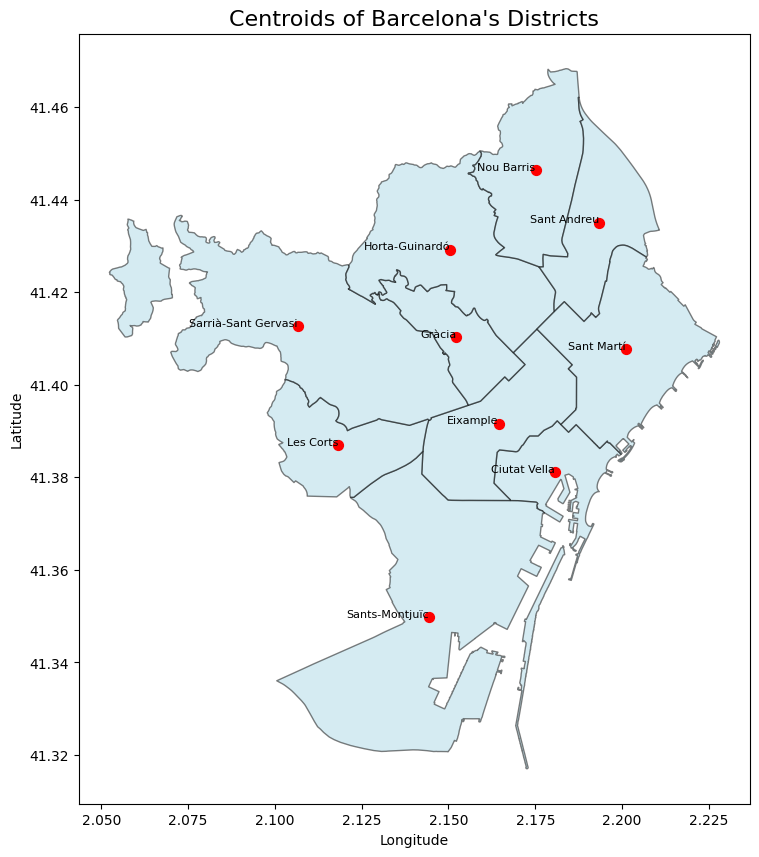

In [40]:
# Plotting the districts using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map of Barcelona districts (polygon boundaries)
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot the centroids as red points on top of the district polygons
ax.scatter(merged['Longitude'], merged['Latitude'], color='red', marker='o', s=50, label="Centroids")

# Add labels for each district at the centroid's location
for idx, row in merged.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['District name'], fontsize=8, ha='right', color='black')

# Set title and labels
ax.set_title("Centroids of Barcelona's Districts", fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

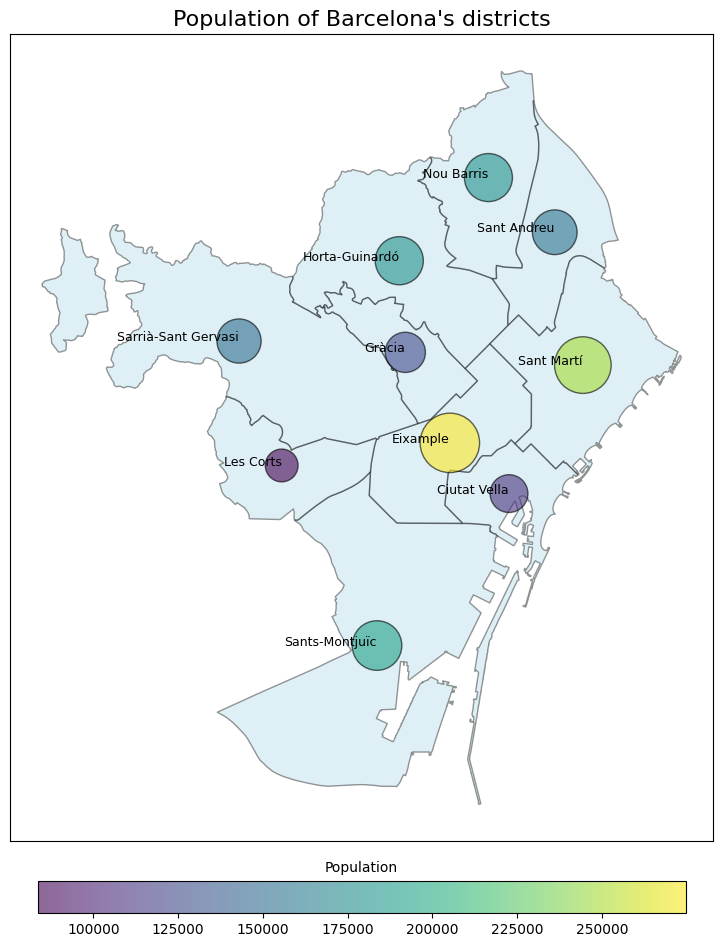

In [41]:
import matplotlib.pyplot as plt

# Plotting the districts using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure size for more width

# Plot the map of Barcelona districts (polygon boundaries)
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.4)

# Normalize population for color scale
pop_norm = plt.Normalize(vmin=merged['Population'].min(), vmax=merged['Population'].max())

# Plot the centroids as circles with size based on population or transport count
scat = ax.scatter(merged['Longitude'], merged['Latitude'],
                  c=merged['Population'], cmap='viridis', s=merged['Population'] / 150,  # Scale size by population
                  alpha=0.6, edgecolors='black', label="Centroids")

# Add a colorbar to show the population scale
cbar = plt.colorbar(scat, ax=ax, orientation='horizontal', shrink=0.6, aspect=20, pad=0.04)  # Added pad to move closer
cbar.set_label('Population', fontsize=10, rotation=0, labelpad=-55)

# Add labels for each district
for idx, row in merged.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['District name'],             
            fontsize=9, ha='right', color='black')

# Set title and labels
ax.set_title("Population of Barcelona's districts", fontsize=16)

# Add more padding to the plot to avoid clipping the labels and move the colorbar closer
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.12)  # Reduced bottom margin

# Remove axis ticks and labels (latitude and longitude)
ax.set_xticks([])  # Remove x-axis ticks (longitude)
ax.set_yticks([])  # Remove y-axis ticks (latitude)

# Show the plot
plt.show()


In [107]:
# Create a folium map centered on Barcelona
# Set initial map location (latitude, longitude) and zoom level
barcelona_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Loop through each district and add a marker to the map
for idx, row in merged.iterrows():
    # Create a popup with district name and population
    popup_content = f"""
    <div style="width: 250px; font-size: 14px;">
        <strong>District: {row['District name']}</strong><br>
        Population: {row['Population']:,.0f} inhabitants
    </div>
    """
    # Add a marker for each district centroid
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # Latitude and Longitude of the centroid
        radius = row['Population'] / 10000,  # Marker size based on population or any other metric
        color='blue',  # Marker color
        weight=0.6,
        fill=True,  # Fill the circle
        fill_color='blue',  # Fill color of the marker
        fill_opacity=0.4,  # Transparency of the fill
        popup=folium.Popup(popup_content,max_width=200)  # The content to show when clicking the marker
    ).add_to(barcelona_map)

# Save the map to an HTML file
barcelona_map.save("barcelona_interactive_map.html")

# If you're using Jupyter Notebook, you can display the map directly
barcelona_map


In [108]:
# Create a folium map centered on Barcelona (or any other location)
barcelona_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)
popup_content = f"District: {row['District name']}<br>Population: {row['Population']}<br>Population density: {row['Population density']}"

# Prepare the heatmap data using the 'Population Density' column
heat_data = [
    [row['Latitude'], row['Longitude'], row['Population density']]  # Use Population Density as intensity
    for idx, row in merged.iterrows()
]

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(barcelona_map)

# Loop through each district and add a marker with a popup
for idx, row in merged.iterrows():  
        # Create a popup with district name, population, and formatted population density
    popup_content = f"""
    <div style="width: 250px; font-size: 14px;">
        <strong>District: {row['District name']}</strong><br>
        Population: {row['Population']:,.0f} inhabitants <br>
        Population Density: {row['Population density']:,.0f} inhab/km²
    </div>
    """
    # Add a marker for each district centroid with popup
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # Latitude and Longitude of the centroid
        radius = row['Population'] / 10000,  # Marker size based on population or any other metric
        color='blue',  # Marker color
        weight=0.0,
        fill='false',  # Do not fill the circle
        popup=popup_content  # The content to show when clicking the marker
    ).add_to(barcelona_map)

# Optionally, save the map to an HTML file
barcelona_map.save("barcelona_heatmap.html")

# If you're using Jupyter Notebook, you can display the map directly
barcelona_map


In [109]:
merged

,District name,Population,City bus,Others,Underground,District area,Latitude,Longitude,Population density
0,Ciutat Vella,111155,114,5,22,4.11,41.381132,2.180728,27045.01
1,Eixample,274636,245,23,103,7.46,41.391593,2.164470,36814.48
2,Gràcia,125787,166,2,15,4.19,41.410262,2.152224,30020.76
3,Horta-Guinardó,180138,309,0,31,11.96,41.429161,2.150571,15061.71
4,Les Corts,83551,162,9,15,6.02,41.386933,2.118236,13878.90
5,Nou Barris,179590,254,1,38,8.05,41.446309,2.175075,22309.32
6,Sant Andreu,155470,161,5,36,6.59,41.435035,2.193309,23591.81
7,Sant Martí,249206,235,22,48,10.39,41.407634,2.201037,23985.18
8,Sants-Montjuïc,191391,334,17,39,22.68,41.349796,2.144444,8438.76
9,Sarrià-Sant Gervasi,151890,333,41,25,19.91,41.412597,2.106513,7628.83


In [ ]:
sns.lmplot(x='Number', y='Transport.Count', data=population_transport_num, height = 5, aspect= 1.5)
plt.title('Regression Line: Population vs Transport Lines')
plt.show()